# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612, CS 652, CS/IT 308 Machine Learning </center>
## <center> Lab#5 Basic optimization techniques </center>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from scipy.io import wavfile
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 
from tqdm import notebook


**Problem 1)** Find minima of following functions using gradient descent method with learning rate 0.01 and 0.1 along with different number of iterations. Try choosing a large value of learning rate and test the convergence. Plot the functions, highlight corresponding minima, and show convergence/divergence on the plot.

(a) $L_1(θ) = θ^2$

(b) $L_2(θ) = θ_1^2 + θ_2^2$

(c) $L_3(θ) = (θ - 1)^2$

(d) $L_4(θ) = 2 (θ_1-1)^2 + 2(θ_2-1)^2$


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics as st
import sympy as sy

# you can assume theta=5000000
# p=theta+1
# e=0.000001
# aplha=0.1

# can use while loop for |p-theta|>e

   
def minimizer(theta,grad,lr):
    e=0.000001
    p=theta+1
    cnt=0
    while abs(p-theta)>e:
        p=theta
        theta=theta-lr*grad
        grad=2*theta
        cnt+=1
    return theta,cnt

theta=5000000
g=2*theta
print("For learning rate=0.01", minimizer(theta,g,0.01))
print("For learning rate=0.1",minimizer(theta,g,0.1))

For learning rate=0.01 (4.871862228969798e-05, 1255)
For learning rate=0.1 (3.847852167616652e-06, 125)


Q1 (b)


In [3]:
#theta0=10000
#theta1=50000

#e=0.000001
#alpha=0.1
def minimizer(theta0,theta1,grad0,grad1,lr):
    e=0.000001
    cnt=0
    p0=theta0+1
    p1=theta1+1
    while abs(p0-theta0)>e or abs(p1-theta1)>e:
        p0=theta0
        p1=theta1
        theta0=theta0-lr*grad0
        grad0=2*theta0
        theta1=theta1-lr*grad1
        grad1=2*theta1
        cnt+=1
    return theta0,theta1,cnt

theta0=10000
theta1=50000
g0=2*theta0
g1=2*theta1
print("For learning rate=0.01", minimizer(theta0,theta1,g0,g1,0.01))
print("For learning rate=0.01", minimizer(theta0,theta1,g0,g1,0.1))
   

# can use while loop for |theta0-p0|>e or |theta1-p1|>e:

For learning rate=0.01 (9.753932283676505e-06, 4.876966141838254e-05, 1027)
For learning rate=0.01 (6.67495948725285e-07, 3.3374797436264246e-06, 105)


Q1 (c)

In [4]:
# theta0=50
# p=theta0+1
# e=0.000001
# alpha=0.1

# while for |theta0-p|>e:
    
def minimizer(theta,grad,lr):
    e=0.000001
    cnt=0
    p=theta+1
    while abs(p-theta)>e:
        p=theta
        theta=theta-lr*grad
        grad=2*(theta-1)
        cnt+=1
    return theta,cnt

theta=50
g=2*(theta-1)
print("For learning rate=0.01", minimizer(theta,g,0.01))
print("For learning rate=0.1",minimizer(theta,g,0.1))

For learning rate=0.01 (1.0000488463203852, 684)
For learning rate=0.1 (1.0000033025934667, 74)


Q1 (d)

In [5]:
#theta0=10000
#theta1=50000


#e=0.000001
#alpha=0.1

#while loop for |theta0-p0|>e or |theta1-p1|>e:
def minimizer(theta0,theta1,grad0,grad1,lr):
    e=0.000001
    cnt=0
    p0=theta0+1
    p1=theta1+1
    while abs(p0-theta0)>e or abs(p1-theta1)>e:
        p0=theta0
        p1=theta1
        theta0=theta0-lr*grad0
        grad0=2*(theta0-1)
        theta1=theta1-lr*grad1
        grad1=2*(theta1-1)
        cnt+=1
    return theta0,theta1,cnt

theta0=10000
theta1=50000
g0=2*(theta0-1)
g1=2*(theta1-1)
print("For learning rate=0.01", minimizer(theta0,theta1,g0,g1,0.01))
print("For learning rate=0.01", minimizer(theta0,theta1,g0,g1,0.1))

For learning rate=0.01 (1.0000097529568905, 1.000048768686025, 1027)
For learning rate=0.01 (1.0000006674291992, 1.0000033374129942, 105)


**Problem 2)** Consider $A=\begin{bmatrix}
0.7 & 0.2\\
0.1 & 0.6
\end{bmatrix}$ and the observation matrix $b=\begin{bmatrix}
0.5\\
0.6
\end{bmatrix}$ in a system $Ax=b$. However, $b$ is not in column space of $A$, thus $Ax \neq b$ and we need to find $x$ in such a way that $Ax \approx b$. Using linear least square $x$ can be estimated by minimizing the mean squared error as,  $\min ||Ax-b||_2$. 

<br>
This can be written as,
        
$\underset{x}{\mathrm{argmin}}||Ax-b||_{2}^{2} = f(x)$

We need to find $x$ in such a way that $f(x)$ will be minimum in $L_2$ norm. 

<br>

You need to solve this least square problem using gradient descent algortithm on $f(x)$.

<br>
To apply this algorithm we need to find gradient of the function, i.e.,
<br>
              $\Delta_x f(x)= A^T(Ax-b) = A^TAx-A^Tb$

<br>

Optimisation for least-squares
<br>
$||A^TAx-A^Tb||_2>\delta$, $\delta$ is the small positive number indicating tolerance.

<br>

Now we will find new $x$ iteratively using step size $\alpha$ to find the best fit for $AX=b$ as:

<br>
$x^{[n+1]}=x^{[n]}-\alpha (A^TAx-A^Tb)$.
<br>

We need to choose $\alpha$, $\delta$ and $x^{[0]}$ to iterate until $x^{[n+1]} \rightarrow x^{[n]}$.

In [6]:
#Write your code here.

A=np.array([[0.7,0.2],[0.1,0.6]])
b=np.array([0.5,0.6])
x=np.array([1,1])
grad=[]
alpha=0.1
cnt=0
e=0.000001
p=x+1
while (abs(p-x)>e).any():
    p=x
    grad=np.dot(np.dot(A.T,A),x)-np.dot(A.T,b)
    x=x-alpha*grad
    cnt+=1
print(x)
print(cnt)

[0.45003116 0.92496009]
349


**Problem 3)** Apply stochastic gradient algorithm on the given dataset and estimate $\theta_0$, $\theta_1$ and final cost value. Step by step hints have been given for the same.



In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
plt.style.use(['ggplot'])

1) Dataset:

In [36]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

2) Visualize the data.

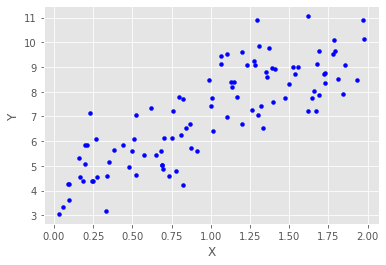

In [37]:
#Write code here
plt.scatter(X,y,c="blue",s=15)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

3) We will write the line equation $y=m \space x+c$ in machine learning form as $J(\theta)=\theta_1 X + \theta_0$. Now choose one random sample $X_b$ (you can concatenate ones and $X$) and find $\theta_{best} = (X_b^T X_b)^{-1}X_b^Ty$.

[[2.20442912]
 [3.79014816]]


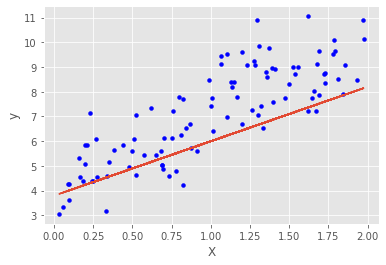

In [38]:
#Write code here.
#X_b 
#theta_best
index=np.random.randint(0,len(X))
X_b=float(X[index])
y_b=float(y[index])
X_b=np.array([1,X_b]).T
theta_best=np.matmul(np.linalg.pinv(np.matmul(X_b.reshape(2,1),X_b.reshape(1,2))),X_b.reshape(2,1))*y_b
plt.scatter(X,y,c="blue",s=15)
plt.plot(X,theta_best[0]*X+theta_best[1])
plt.xlabel("X")
plt.ylabel("y")
print(theta_best)

In [39]:
index=np.random.randint(0,len(X))
X_b=float(X[index])
y_b=float(y[index])
X_b=np.array([1,X_b])
print(np.dot(X_b,X_b))

3.715680376298836


4) For example choose $X_{new}=\begin{bmatrix}
0 \\
2 
\end{bmatrix}$. Obtain $X_{new_b}$ by concatinating ones and $X_{new}$. Finally find $y_{predict}=X_{new_b}\theta_{best}$.

In [40]:
#Write code here.
#X_new
#X_new_b
#y_predict

X_new=[0,2]
X_new_b=np.array([np.ones(2),X_new]).T
y_predict=np.matmul(X_new_b,theta_best)
print(y_predict)

[[2.20442912]
 [9.78472544]]


5) Visualize $X_{new}$ and $y_{predict}$.

In [41]:
#Write code here.




6) Define the cost function.

In [15]:
def  cal_cost(theta,X,y):
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    
    return cost

7) Define the gradient descent function.

In [16]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
  
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)

    return theta, cost_history, theta_history

8) Using learning rate $0.01$ and $1000$ iterations find $\theta_0$, $\theta_1$ and final cost.

In [17]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]

theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.550,
Theta1:          3.365
Final cost/MSE:  4643.197


9) Plot $J(\theta)$ and iterations.

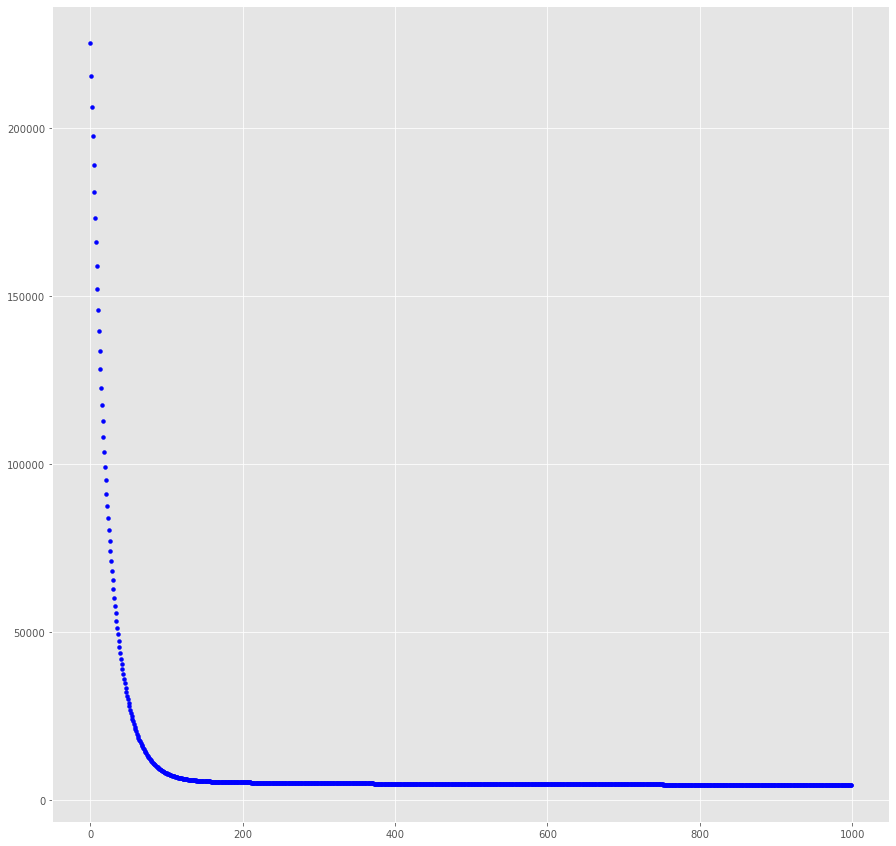

In [18]:
#Write code here.
plt.figure(figsize=(15,15))
plt.scatter(np.arange(len(cost_history)),cost_history,c="blue",s=15)

10) You can also observe the changes in cost function.

In [19]:
#Write code here.



**Problem 4)** Find minimum of the function $L(θ)$ = using stochastic gradient descent method (take the data from the excel sheet given). Choose different learning rates and number of iterations.



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics as st
import sympy as sy

In [8]:
import pandas as pd
import random

#Read the excel sheet given
def gradient(X,Y,theta1,theta2):
    grad2=2*X*(Y-(theta2*x+theta1))

#noralize x
def minimizer(xnorm,y,lr):
    theta0 = 1000
    theta1 = 500
    e=0.000001
    cnt=0
    p0=theta0+1
    p1=theta1+1
    while abs(p0-theta0)>e or abs(p1-theta1)>e:
        i=np.random.randint(0,len(xnorm))
        X,Y=xnorm[i],y[i]
        p0=theta0
        p1=theta1
        grad0=-2*(Y-(theta1*X+theta0))
        grad1=-2*X*(Y-(theta1*X+theta0))
        theta0=theta0-lr*grad0
        theta1=theta1-lr*grad1
        cnt+=1
    return theta0,theta1,cnt



df=pd.read_csv("data.csv")
x = np.array(df['x'])
y = np.array(df['y'])
xnorm=(x-x.mean())/x.std()
theta0,theta1,cnt=minimizer(xnorm,y,0.001)
print("Thetas",theta0,theta1)
print("Iterations",cnt)

Thetas 23.704744310084962 -6.705561105821078
Iterations 18865


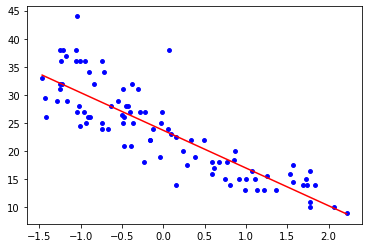

In [9]:
plt.scatter(xnorm,y,c="blue",s=15)
data=np.arange(xnorm.min(),xnorm.max(),0.0001)
plt.plot(data,theta1*data+theta0,c="red")